# **F**lux **S**canning based on **E**nforced **O**bjective **F**lux

The Flux Scanning based on Enforced Objective Flux (FSEOF) tool from Cameo can be used to predict gene targets for up- and donwregulation to improve the metabolic flux towards a product.

In [1]:
# Load dependencies
import numpy as np
from matplotlib import pyplot as plt
from cobra.io import read_sbml_model
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [2]:
# Load model
model = read_sbml_model('../models/Adjusted_models/iMT1026-v3_MalonicAcid.xml')

# Change substrate
medium = model.medium
medium['Ex_glyc'] = 0
medium['Ex_meoh'] = 6
model.medium = medium

# Define functions
plotter = PlotlyPlotter()
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.MSADH)
df = result.data_frame

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-13


In [3]:
# Run the algorithm
fseof.run(target=model.reactions.MSADH)

,1,2,3,4,5,6,7,8,9,10
FACOAE140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000002
GLCCERS18d4,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
CER4DS18,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000,0.00000,0.000000,0.000000
TYRPYRAT,-0.007401,-0.006799,-0.006193,-0.005556,-0.004920,-0.004283,-0.003646,-0.00301,-0.002373,-0.001442
FARavge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000426
...,...,...,...,...,...,...,...,...,...,...
FA181tpc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000129
FA182tpc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000115
FA183tpc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000091
mac_etoEX,0.180000,0.360000,0.540000,0.720000,0.900000,1.080000,1.260000,1.44000,1.620000,1.800000


In [4]:
model.reactions.TYRPYRAT

Reaction identifier,TYRPYRAT
Name,L-tyrosine:pyruvate aminotransferase
Memory address,0x020be659a100
Stoichiometry,pyr_c + tyr_L_c <=> 34hpp_c + ala_L_c Pyruvate + L-Tyrosine <=> 3-(4-Hydroxyphenyl)pyruvate + L-Alanine
GPR,PAS_chr4_0147 or PAS_chr1-1_0200 or PAS_chr1-4_0608 or PAS_chr2-1_0684 or PAS_chr4_0974
Lower bound,-1000.0
Upper bound,1000.0


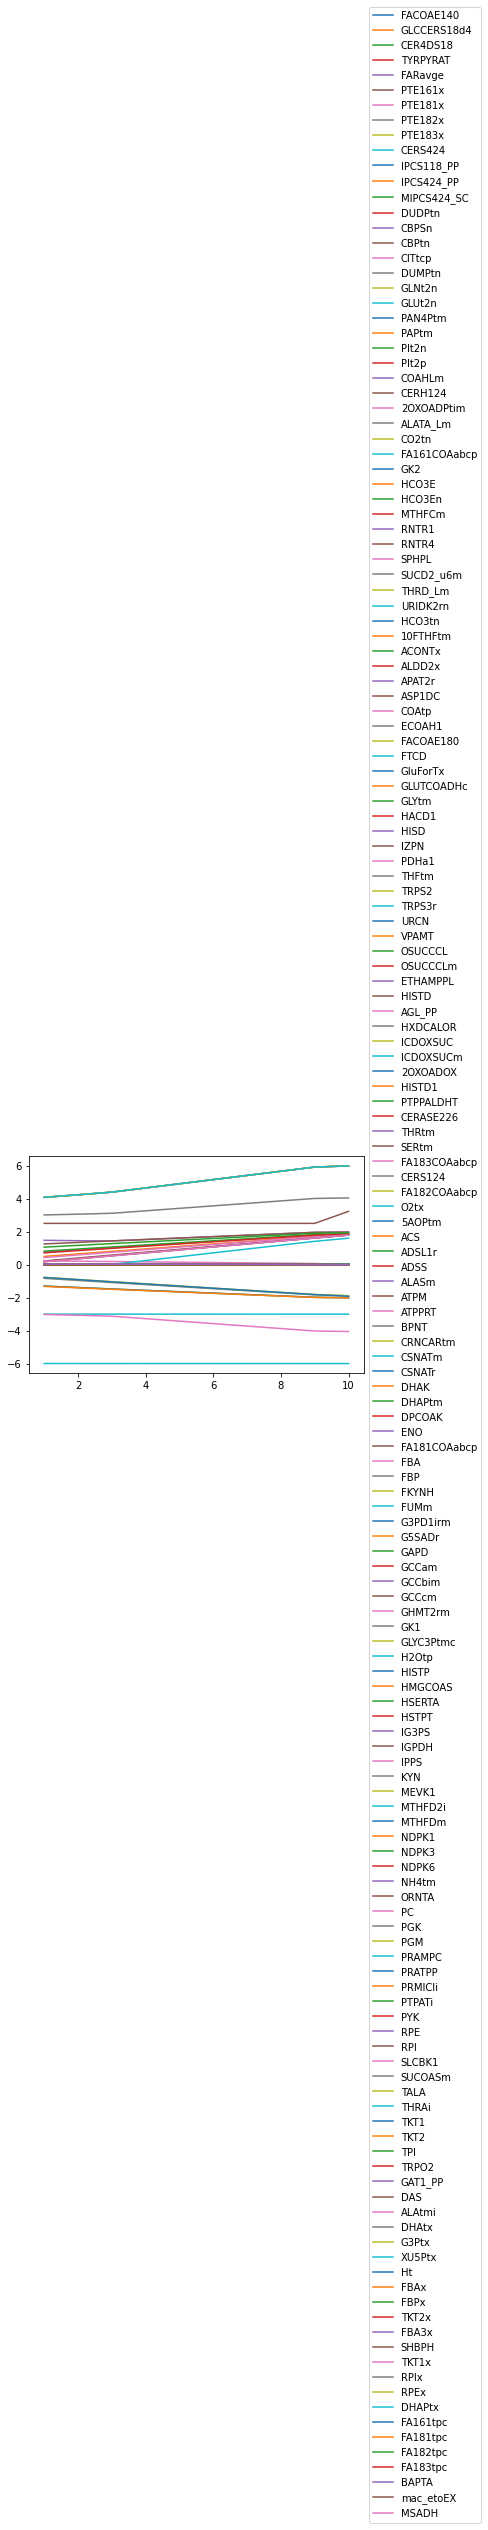

In [5]:
# Plot the resulting fluxes
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [6]:
# This was a work in progress, might not use it

# highs = (df > -0.001).all(axis=1)
# df = df.loc[highs]
# lows = (df < 0.001).all(axis=1)
# df.loc[lows]

In [7]:
# Table with ordered negative flux reactions
df = df.sort_values([10], ascending = True)
df[:25]

,1,2,3,4,5,6,7,8,9,10
H2Otp,-5.995600,-5.995958,-5.996318,-5.996697,-5.997075,-5.997454,-5.997832,-5.998211,-5.998589,-5.998444
FBA,-3.022531,-3.068387,-3.123100,-3.273052,-3.423005,-3.572958,-3.722910,-3.872863,-4.022815,-4.054321
O2tx,-2.997800,-2.997979,-2.998159,-2.998348,-2.998538,-2.998727,-2.998916,-2.999105,-2.999295,-2.999572
TKT2,-1.314987,-1.402563,-1.489695,-1.572059,-1.654422,-1.736786,-1.819150,-1.901513,-1.983877,-2.010427
TKT1,-1.293526,-1.382849,-1.471738,-1.555947,-1.640157,-1.724367,-1.808577,-1.892786,-1.976996,-2.006245
TALA,-1.293526,-1.382849,-1.471738,-1.555947,-1.640157,-1.724367,-1.808577,-1.892786,-1.976996,-2.006245
Ht,-0.773813,-0.905457,-1.036870,-1.165788,-1.294705,-1.423623,-1.552541,-1.681458,-1.810376,-1.915709
PGM,-0.765181,-0.897528,-1.029647,-1.159307,-1.288968,-1.418628,-1.548288,-1.677948,-1.807609,-1.883036
PGK,-0.825324,-0.952774,-1.079972,-1.204458,-1.328945,-1.453431,-1.577918,-1.702404,-1.826891,-1.883036
NH4tm,-0.015686,-0.014408,-0.013125,-0.011776,-0.010426,-0.009077,-0.007728,-0.006378,-0.005029,-0.017420


In [8]:
model.reactions.ALATA_L

Reaction identifier,ALATA_L
Name,L-alanine transaminase
Memory address,0x020be6c9f760
Stoichiometry,akg_c + ala_L_c <=> glu_L_c + pyr_c 2-Oxoglutarate + L-Alanine <=> L-Glutamate + Pyruvate
GPR,PAS_chr3_0482
Lower bound,-1000.0
Upper bound,1000.0


In [9]:
# Table with ordered positive flux reactions
df = df.sort_values([10], ascending = False)
df[:25]

,1,2,3,4,5,6,7,8,9,10
DAS,4.091681,4.245132,4.407092,4.660556,4.914020,5.167484,5.420948,5.674412,5.927877,6.000000
DHAtx,4.091681,4.245132,4.407092,4.660556,4.914020,5.167484,5.420948,5.674412,5.927877,6.000000
DHAK,4.091681,4.245132,4.407092,4.660556,4.914020,5.167484,5.420948,5.674412,5.927877,6.000000
G3Ptx,4.091681,4.245132,4.407092,4.660556,4.914020,5.167484,5.420948,5.674412,5.927877,5.999475
XU5Ptx,4.091681,4.245132,4.407092,4.660556,4.914020,5.167484,5.420948,5.674412,5.927877,5.999475
FBP,3.022531,3.068387,3.123100,3.273052,3.423005,3.572958,3.722910,3.872863,4.022815,4.054321
ATPM,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,3.238861
RPE,1.483168,1.459720,1.445659,1.532550,1.619441,1.706331,1.793222,1.880113,1.967004,1.982804
RPI,1.262359,1.354221,1.445659,1.532550,1.619441,1.706332,1.793222,1.880113,1.967004,1.982804
TPI,1.067666,1.175382,1.282751,1.386390,1.490029,1.593668,1.697307,1.800946,1.904586,1.945040


In [10]:
model.reactions.XU5Ptx

Reaction identifier,XU5Ptx
Name,xylulose-5-phosphate transport
Memory address,0x020be6fdb820
Stoichiometry,xu5p_D_c <=> xu5p_D_x D-Xylulose 5-phosphate <=> D-Xylulose 5-phosphate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

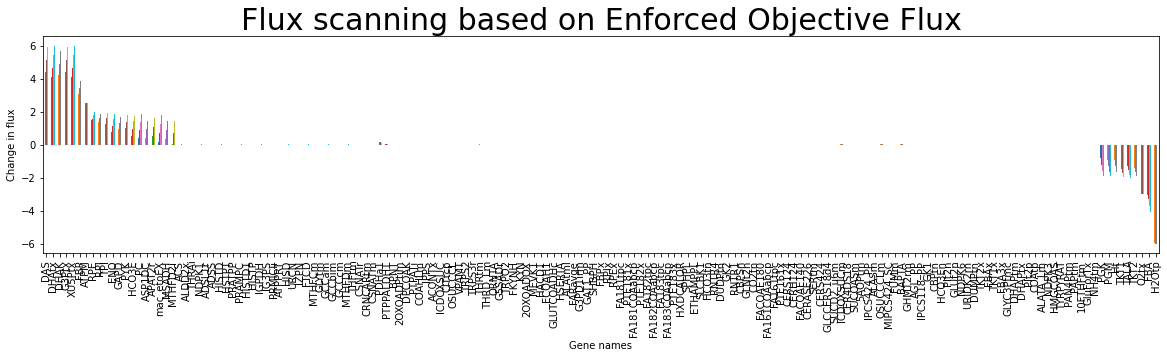

In [11]:
# Table depicting overall fluxes, will update or remove this as it is not very informative as is.
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [12]:
df['relative_change_in_flux'] = abs(df[10]-df[1])/abs(df[1])

In [13]:
# Table with reactions that have a < 50% change in flux, excluding Inf due to absolute 0 fluxes.
target_reactions_df = df[df['relative_change_in_flux'] > 0.50]
target_reactions_df = target_reactions_df.sort_values(['relative_change_in_flux'], ascending = False)
target_reactions_df = target_reactions_df[target_reactions_df['relative_change_in_flux'] != np.Inf]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
DPCOAK,0.000005,0.000005,0.000004,0.000004,0.000004,0.000003,0.000003,0.000002,0.000002,0.005200,1039.000000
PTPATi,0.000005,0.000005,0.000004,0.000004,0.000004,0.000003,0.000003,0.000002,0.000002,0.005200,1039.000000
THFtm,0.000774,0.000711,0.001429,0.001282,0.001135,0.000988,0.000842,0.000695,0.000548,0.014514,17.751938
GCCbim,0.000934,0.000858,0.000781,0.000701,0.000621,0.000540,0.000460,0.000380,0.000299,0.014545,14.572805
MTHFCm,0.000934,0.000858,0.001563,0.001402,0.001242,0.001081,0.000920,0.000760,0.000599,0.014545,14.572805
...,...,...,...,...,...,...,...,...,...,...,...
RPI,1.262359,1.354221,1.445659,1.532550,1.619441,1.706332,1.793222,1.880113,1.967004,1.982804,0.570713
TKT1,-1.293526,-1.382849,-1.471738,-1.555947,-1.640157,-1.724367,-1.808577,-1.892786,-1.976996,-2.006245,0.550989
TALA,-1.293526,-1.382849,-1.471738,-1.555947,-1.640157,-1.724367,-1.808577,-1.892786,-1.976996,-2.006245,0.550989
BPNT,0.003857,0.003543,0.003228,0.002896,0.002564,0.002232,0.001900,0.001569,0.001237,0.005950,0.542650


In [14]:
model.reactions.DPCOAK

Reaction identifier,DPCOAK
Name,dephospho-CoA kinase
Memory address,0x020be6d529d0
Stoichiometry,atp_c + dpcoa_c --> adp_c + coa_c + h_c ATP + Dephospho-CoA --> ADP + CoA + H+
GPR,PAS_chr4_0477
Lower bound,0.0
Upper bound,1000.0


In [15]:
# Table with reactions that have a < 50% change in flux, ordered based on absolute change in flux
target_reactions_df2 = target_reactions_df
target_reactions_df2['absolute_change'] = abs(target_reactions_df[10] - target_reactions_df[1])
target_reactions_df2 = target_reactions_df2.sort_values(['absolute_change'], ascending = False)
target_reactions_df2[:30]

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux,absolute_change
mac_etoEX,0.180000,0.360000,0.540000,0.720000,0.900000,1.080000,1.260000,1.440000,1.620000,1.800000,9.000000,1.620000
MSADH,0.180000,0.360000,0.540000,0.720000,0.900000,1.080000,1.260000,1.440000,1.620000,1.800000,9.000000,1.620000
APAT2r,0.194698,0.373501,0.552299,0.731034,0.909770,1.088505,1.267241,1.445977,1.624712,1.800432,8.247306,1.605734
ASP1DC,0.231187,0.407019,0.582831,0.758427,0.934024,1.109621,1.285217,1.460814,1.636411,1.800433,6.787778,1.569246
PC,0.433895,0.593220,0.752445,0.910604,1.068763,1.226922,1.385081,1.543240,1.701399,1.852532,3.269540,1.418637
HCO3E,0.504238,0.657835,0.811305,0.963412,1.115520,1.267628,1.419735,1.571843,1.723951,1.866240,2.701109,1.362002
PYK,0.722258,0.858100,0.993732,1.127084,1.260437,1.393790,1.527142,1.660495,1.793848,1.874672,1.595571,1.152414
Ht,-0.773813,-0.905457,-1.036870,-1.165788,-1.294705,-1.423623,-1.552541,-1.681458,-1.810376,-1.915709,1.475674,1.141896
ENO,0.765181,0.897528,1.029647,1.159307,1.288968,1.418628,1.548288,1.677948,1.807609,1.883036,1.460903,1.117855
PGM,-0.765181,-0.897528,-1.029647,-1.159307,-1.288968,-1.418628,-1.548288,-1.677948,-1.807609,-1.883036,1.460903,1.117855


In [16]:
model.reactions.PGK

Reaction identifier,PGK
Name,phosphoglycerate kinase
Memory address,0x020be6e99fd0
Stoichiometry,3pg_c + atp_c <=> 13dpg_c + adp_c 3-Phospho-D-glycerate + ATP <=> 3-Phospho-D-glyceroyl phosphate + ADP
GPR,PAS_chr1-4_0292
Lower bound,-1000.0
Upper bound,1000.0


In [17]:
model.metabolites.msa_c

Metabolite identifier,msa_c
Name,3-Oxopropanoate
Memory address,0x020be6260580
Formula,C3H3O3
Compartment,c
In 4 reaction(s),"BAPTA, MMSAD3, APAT2r, MSADH"


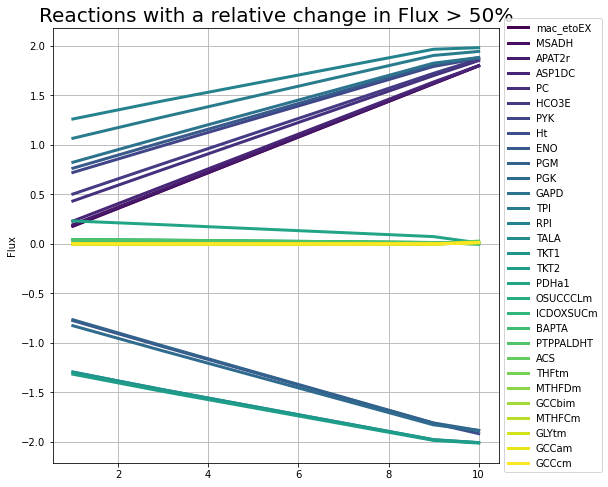

In [18]:
df = target_reactions_df2[:30].drop(['relative_change_in_flux', 'absolute_change'], axis = 1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 50%', size=20)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))

In [19]:
model.reactions.MTHFD2i

Reaction identifier,MTHFD2i
Name,methylenetetrahydrofolate dehydrogenase (NAD)
Memory address,0x020be6e61bb0
Stoichiometry,"mlthf_c + nad_c --> methf_c + nadh_c 5,10-Methylenetetrahydrofolate + NAD+ --> 5,10-Methenyltetrahydrofolate + NADH"
GPR,PAS_chr1-3_0220
Lower bound,0.0
Upper bound,1000.0
